In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Metaanlysis from (Zhao 2020)
met = pd.read_csv('from_meta_analysis.csv', index_col=0)
met

,symptom,met_mean,mean_ci,low_ci,high_ci
0,Fever,79.1,(68.0-90.3),68.0,90.3
1,Cough,58.0,(42.0-74.0),42.0,74.0
2,Fatigue,29.3,(23.4-35.3),23.4,35.3
3,Shortness of breath,3.5,(2.2-4.9),2.2,4.9
4,Nausea or vomiting,2.0,(1.0-2.9),1.0,2.9
5,Diarrhea,5.7,(3.9-7.5),3.9,7.5
6,Runny nose,1.1,(0.3-1.9),0.3,1.9
7,Muscle pains,3.8,(2.4-5.2),2.4,5.2


In [8]:
# Summary stats from Neighboorhoods with no known COVID19 patients history'
scat = pd.read_csv('blue_data_points.csv', index_col=0)
scat

,symptom,met_mean,mean_ci,low_ci,high_ci,data_mean,data_high_ci,data_low_ci
0,Fever,79.1,(68.0-90.3),68.0,90.3,0.302454,0.344076,0.263607
1,Cough,58.0,(42.0-74.0),42.0,74.0,13.543849,13.796357,13.299666
2,Fatigue,29.3,(23.4-35.3),23.4,35.3,4.022087,4.166378,3.879185
3,Shortness of breath,3.5,(2.2-4.9),2.2,4.9,1.925718,2.028386,1.828600
4,Nausea or vomiting,2.0,(1.0-2.9),1.0,2.9,0.579935,0.635432,0.525827
5,Diarrhea,5.7,(3.9-7.5),3.9,7.5,1.732869,1.827213,1.637138
6,Rhinorrhea or nasal congestion,1.1,(0.3-1.9),0.3,1.9,13.216421,13.459217,12.961139
7,Muscle pains,3.8,(2.4-5.2),2.4,5.2,3.154959,3.282601,3.028705


In [9]:
# Summary stats from Neighboorhoods with known COVID19 patients history'
scat2 = pd.read_csv('red_data_points.csv', index_col=0)
scat2

,symptom,met_mean,mean_ci,low_ci,high_ci,data_mean,data_high_ci,data_low_ci
0,Fever,79.1,(68.0-90.3),68.0,90.3,0.413034,0.688389,0.183570
1,Cough,58.0,(42.0-74.0),42.0,74.0,15.006884,16.521340,13.492428
2,Fatigue,29.3,(23.4-35.3),23.4,35.3,5.277650,6.195503,4.359798
3,Shortness of breath,3.5,(2.2-4.9),2.2,4.9,1.927490,2.524094,1.376778
4,Nausea or vomiting,2.0,(1.0-2.9),1.0,2.9,0.688389,1.055530,0.367141
5,Diarrhea,5.7,(3.9-7.5),3.9,7.5,1.698027,2.294631,1.193208
6,Rhinorrhea or nasal congestion,1.1,(0.3-1.9),0.3,1.9,12.895824,14.272602,11.519045
7,Muscle pains,3.8,(2.4-5.2),2.4,5.2,3.900872,4.726939,3.120698


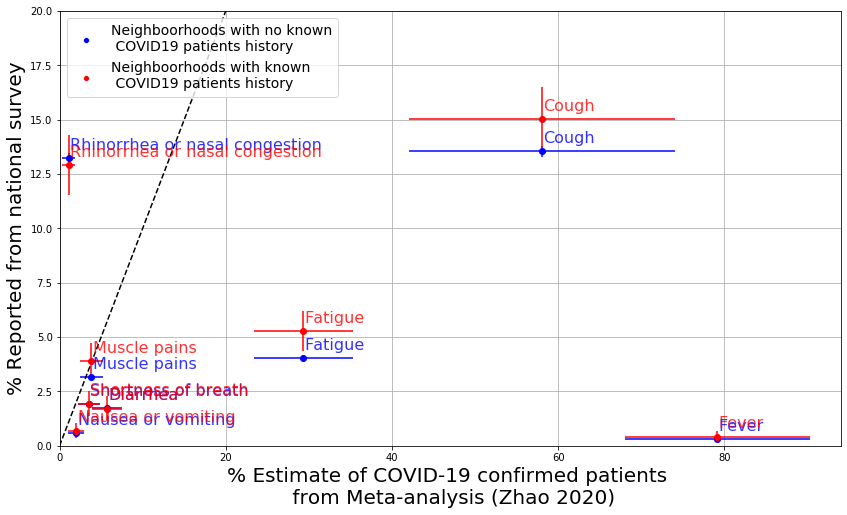

In [12]:
fig,ax = plt.subplots(1,1, figsize=(14,8))

x = scat['met_mean']
y = scat['data_mean']
xerr = [(scat['low_ci']-scat['met_mean']).abs(), (scat['high_ci']-scat['met_mean']).abs()]
yerr = [(scat['data_low_ci']-scat['data_mean']).abs(), (scat['data_high_ci']-scat['data_mean']).abs()]

sns.scatterplot(x, y,ax=ax,
                label='Neighboorhoods with no known\n COVID19 patients history', color='b')
ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', color='b')


for i, txt in enumerate(scat['symptom']):
    ax.annotate(txt, (scat.loc[i,'met_mean']+0.2, scat.loc[i, 'data_mean']+0.4), size=16, alpha=0.8, color='b')

x = scat2['met_mean']    
y = scat2['data_mean']
xerr=[(scat2['low_ci']-scat2['met_mean']).abs(), (scat2['high_ci']-scat2['met_mean']).abs()]    
yerr = [(scat2['data_low_ci']-scat2['data_mean']).abs(), (scat2['data_high_ci']-scat2['data_mean']).abs()]

sns.scatterplot(scat2['met_mean'], scat2['data_mean'],ax=ax, color='r',
                label='Neighboorhoods with known\n COVID19 patients history')
ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', color='r')

for i, txt in enumerate(scat2['symptom']):
    ax.annotate(txt, (scat2.loc[i,'met_mean']+0.2, scat2.loc[i, 'data_mean']+0.4), size=16, alpha=0.8, color='r')


ax.set_xlabel('% Estimate of COVID-19 confirmed patients \n from Meta-analysis (Zhao 2020)', size=20)
ax.set_ylabel('% Reported from national survey', size=20)
ax.plot((0,100), (0,100), 'k--')
ax.grid()
ax.legend(fontsize=14, loc='upper left')
ax.set_xlim(0,94)
ax.set_ylim(0,20);